In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [120]:
train = pd.read_csv('train.csv')

In [121]:
test = pd.read_csv('test.csv')

In [122]:
combined = pd.concat([train,test],ignore_index= True)

In [123]:
combined

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [124]:
train.shape, test.shape, combined.shape

((1460, 81), (1459, 80), (2919, 81))

<Axes: xlabel='SalePrice', ylabel='Density'>

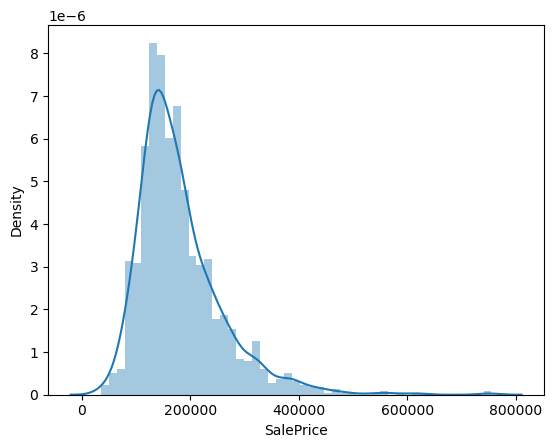

In [125]:
sns.distplot(train.SalePrice)

<Axes: >

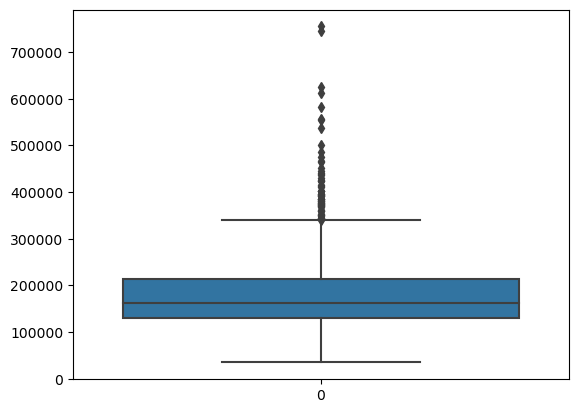

In [126]:
sns.boxplot(train.SalePrice)

In [127]:
####target variable is very skewed
combined.select_dtypes(include = np.number).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [128]:

cat_cols = []

In [129]:
###fill null values then do rfe or sfs or can even try ridge 

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [131]:
print(combined.isnull().sum()[combined.isnull().sum() > 0]/combined.shape[0])
print('no of columns with null values',len(combined.isnull().sum()[combined.isnull().sum() > 0]/combined.shape[0])-1)
#looking for null values

MSZoning        0.001370
LotFrontage     0.166495
Alley           0.932169
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
MasVnrArea      0.007879
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinSF1      0.000343
BsmtFinType2    0.027407
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
KitchenQual     0.000343
Functional      0.000685
FireplaceQu     0.486468
GarageType      0.053786
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageCars      0.000343
GarageArea      0.000343
GarageQual      0.054471
GarageCond      0.054471
PoolQC          0.996574
Fence           0.804385
MiscFeature     0.964029
SaleType        0.000343
SalePrice       0.499829
dtype: float64
no of columns with null values 34


In [132]:
#There are 34 columns with null values because we will not consider SalePrice as it's the target

In [133]:
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [134]:
combined.describe(include = object).T

,count,unique,top,freq
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
Alley,198,2,Grvl,120
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511


In [135]:
combined['PoolQC'].fillna('No_pool', inplace=True)

combined['FireplaceQu'].fillna('No_fp', inplace=True)


combined['GarageType'].fillna('No_garage', inplace=True)

combined['GarageFinish'].fillna('No_garage', inplace=True)

combined['GarageQual'].fillna('No_garage', inplace=True)

combined['GarageFinish'].fillna('No_garage', inplace=True)

combined['Fence'].fillna('No_fence', inplace=True)

combined['GarageYrBlt'].fillna(0, inplace=True)

In [136]:
print((combined.isnull().sum()[combined.isnull().sum() > 0]/combined.shape[0])*100)
print('no of columns with null values',len(combined.isnull().sum()[combined.isnull().sum() > 0]/combined.shape[0])-1)

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
GarageCars       0.034258
GarageArea       0.034258
GarageCond       5.447071
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64
no of columns with null values 27


In [137]:
combined.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [138]:
combined.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [139]:
#we can see that alley and misc feature have more than 90% data missing, for now we will proceed with these columns
#and fill null values as no alley and no miscfeature 

In [140]:
combined['Alley'].fillna('No_alley', inplace=True)

combined['MiscFeature'].fillna('No_misc_feat',inplace = True)

In [141]:
print((combined.isnull().sum()[combined.isnull().sum() > 0]/combined.shape[0])*100)
print('no of columns with null values',len(combined.isnull().sum()[combined.isnull().sum() > 0]/combined.shape[0])-1)

MSZoning         0.137033
LotFrontage     16.649538
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
GarageCars       0.034258
GarageArea       0.034258
GarageCond       5.447071
SaleType         0.034258
SalePrice       49.982871
dtype: float64
no of columns with null values 25


In [142]:
combined[combined.isnull().columns].describe(include = np.number).T
#we can see that many numerical columns are skewed so we will impute median into numerical null values and mode into categorical null values

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [143]:
combined.columns[combined.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'GarageCond',
       'SaleType', 'SalePrice'],
      dtype='object')

In [144]:
for column in combined.columns[combined.isnull().any()]:
    if column == 'SalePrice':
        continue
    if combined[column].dtype == 'object':
        combined[column].fillna(combined[column].mode()[0], inplace=True)
    else:
        combined[column].fillna(combined[column].median(), inplace=True)
       

In [145]:
combined.isnull().sum()[combined.isnull().sum() > 0]

SalePrice    1459
dtype: int64

In [146]:
# all null values have been filled, now we will proceed with feature selection
newtrain = combined.loc[0:train.shape[0]-1, ]
newtest = combined.loc[train.shape[0]:, ]

In [147]:
train.shape,newtrain.shape,test.shape,newtest.shape

((1460, 81), (1460, 81), (1459, 80), (1459, 81))

In [148]:
newtrain.drop('Id', axis=1, inplace=True)
y = newtrain['SalePrice']

X = newtrain.drop(['SalePrice'], axis=1)



In [149]:
from sklearn.preprocessing import OneHotEncoder

In [150]:
categorical_cols = X.select_dtypes(include='object').columns

In [151]:
encoder = OneHotEncoder(sparse=False, drop='first')
encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
encoded.columns = encoder.get_feature_names_out(categorical_cols)



In [152]:
X.drop(categorical_cols, axis=1, inplace=True)
X = pd.concat([X, encoded], axis=1)

In [153]:
#test encoding
test_original = newtest.copy()


In [154]:
newtest.drop('Id', axis=1, inplace=True)

In [155]:
categorical_cols_test = newtest.select_dtypes(include='object').columns
X_test_encoded = pd.DataFrame(encoder.transform(newtest[categorical_cols_test]))
X_test_encoded.columns = encoder.get_feature_names_out(categorical_cols_test)


In [156]:
newtest.drop(categorical_cols_test, axis=1, inplace=True)


In [157]:
newtest_reindex = newtest.reindex().reset_index(drop=True)

In [158]:
X_test = pd.concat([newtest_reindex, X_test_encoded], axis=1)


In [159]:
X.shape,X_test.shape

((1460, 253), (1459, 254))

In [160]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score,KFold

In [161]:
lr = LinearRegression()

In [162]:
lr.fit(X, y)

y_pred = lr.predict(X)

r2_train = r2_score(y, y_pred)
rmse_train = mean_squared_error(y, y_pred, squared=False)

print(f'R-squared on training data: {r2_train}')
print(f'RMSE on training data: {rmse_train}')


R-squared on training data: 0.9329542274627396
RMSE on training data: 20563.159118528445


In [163]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, X, y, cv=kf, scoring='r2')

print(f'Cross-validated R-squared: {cv_scores.mean()}')

Cross-validated R-squared: 0.5953734364400495


In [164]:
import statsmodels.api as sma

#sma with constant
X_c = sma.add_constant(X) 
model = sma.OLS(y, X_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     67.95
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:22:13   Log-Likelihood:                -16571.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1211   BIC:                         3.496e+04
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -5.924e+05   1.06e+06     -0.561      0.575   -2.67e+06    1.48e+06
MSSubClass                 -65.1752     82.470     -0.790      0.430    -226.975      96.625
LotFrontage                 40.9827     43.808      0.936      0.350     -44.964     126.930
LotArea                      0.7015      0.109      6.420      0.000       0.487       0.916
OverallQual               6693.3154   1010.868      6.621      0.000    4710.068    8676.563
OverallCond               5725.5312    870.281      6.579      0.000    4018.105    7432.957
YearBuilt                  328.6645     76.844      4.277      0.000     177.902     479.427
YearRemodAdd                99.5357     55.680      1.788      0.074      -9.704     208.775
MasVnrArea                  21.4108      5.776      3.707      0.000      10.079      32.742
BsmtFinSF1                  14.5552      2.839      5.126      0.000       8.985      20.126
BsmtFinSF2                   7.5281      5.844      1.288      0.198      -3.938      18.994
BsmtUnfSF                   -3.6698      2.627     -1.397      0.163      -8.824       1.485
TotalBsmtSF                 18.4135      3.491      5.274      0.000      11.564      25.263
1stFlrSF                    22.1142      6.173      3.582      0.000      10.003      34.226
2ndFlrSF                    35.0333      5.417      6.467      0.000      24.405      45.662
LowQualFinSF               -30.4590     13.901     -2.191      0.029     -57.732      -3.186
GrLivArea                   26.6884      5.675      4.703      0.000      15.555      37.822
BsmtFullBath              1326.4672   1973.222      0.672      0.502   -2544.846    5197.781
BsmtHalfBath              -599.2581   3023.020     -0.198      0.843   -6530.197    5331.681
FullBath                  3814.5945   2196.789      1.736      0.083    -495.340    8124.529
HalfBath                  1600.2291   2087.521      0.767      0.443   -2495.330    5695.789
BedroomAbvGr             -3728.1473   1363.158     -2.735      0.006   -6402.560   -1053.734
KitchenAbvGr             -1.341e+04   5677.615     -2.361      0.018   -2.45e+04   -2267.201
TotRmsAbvGrd              1771.2875    953.987      1.857      0.064    -100.363    3642.938
Fireplaces                6174.0843   2551.610      2.420      0.016    1168.017    1.12e+04
GarageYrBlt                -24.5904     61.141     -0.402      0.688    -144.545      95.364
GarageCars                4016.1866   2275.113      1.765      0.078    -447.414    8479.787
GarageArea                  18.0728      7.878      2.294      0.022       2.616      33.530
WoodDeckSF                  15.3943      5.861      2.627      0.009       3.896      26.893
OpenPorchSF                  3.4242     11.494      0.298      0.766     -19.127      25.975
EnclosedPorch 

In [165]:
model.pvalues[model.pvalues < 0.05]


LotArea                 1.948024e-10
OverallQual             5.336864e-11
OverallCond             7.034072e-11
YearBuilt               2.043067e-05
MasVnrArea              2.191446e-04
                            ...     
PoolQC_Gd               5.790597e-04
PoolQC_No_pool          4.245998e-02
Fence_MnPrv             1.590226e-02
Fence_No_fence          1.236580e-02
SaleCondition_Normal    2.388410e-02
Length: 71, dtype: float64

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif1 = pd.DataFrame({'vif':vif},index = X.columns).sort_values(by = 'vif',ascending= False)

In [167]:
vif_treat = (vif1[vif1<10]).dropna()

In [168]:
vif_treat

,vif
Exterior1st_Stucco,9.709846
Neighborhood_Sawyer,9.510563
BldgType_2fmCon,9.437517
Exterior2nd_Stucco,9.405995
BsmtExposure_No,9.150112
...,...
3SsnPorch,1.242376
LotConfig_FR3,1.229247
SaleType_Oth,1.227912
SaleType_Con,1.203929


In [169]:
vif_treat.index

Index(['Exterior1st_Stucco', 'Neighborhood_Sawyer', 'BldgType_2fmCon',
       'Exterior2nd_Stucco', 'BsmtExposure_No', 'Neighborhood_NWAmes',
       'Exterior1st_WdShing', 'Neighborhood_Gilbert', 'RoofStyle_Gambrel',
       'GarageQual_Po',
       ...
       'HeatingQC_Po', 'Utilities_NoSeWa', 'SaleType_ConLI', 'SaleType_CWD',
       'Foundation_Wood', '3SsnPorch', 'LotConfig_FR3', 'SaleType_Oth',
       'SaleType_Con', 'Condition1_RRNe'],
      dtype='object', length=140)

In [170]:
#now we will check for multicollinerity after removing all the other multicollinear variables from data

In [171]:
X_vif = X[vif_treat.index]

In [172]:
vif = [variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])]
vif1 = pd.DataFrame({'vif':vif},index = X_vif.columns).sort_values(by = 'vif',ascending= False)

In [173]:
vif1
#we can see now all the multicollinearity is removed

,vif
BsmtExposure_No,6.502347
MoSold,6.350501
LotConfig_Inside,5.141914
LotArea,4.958083
BsmtFinType1_Unf,4.146511
...,...
RoofMatl_Roll,1.066778
SaleType_CWD,1.065390
SaleType_ConLI,1.062123
Exterior2nd_Other,1.059991


In [174]:
model1 = sma.OLS(y, X).fit()
# Without Intercept - Full Model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              446.2
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        21:22:58   Log-Likelihood:                         -16571.
No. Observations:                1460   AIC:                                  3.364e+04
Df Residuals:                    1212   BIC:                                  3.495e+04
Df Model:                         248                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
MSSubClass                 -66.8613     82.392     -0.812      0.417    -228.508      94.785
LotFrontage                 41.1866     43.794      0.940      0.347     -44.733     127.106
LotArea                      0.7009      0.109      6.417      0.000       0.487       0.915
OverallQual               6705.0304   1010.366      6.636      0.000    4722.770    8687.291
OverallCond               5738.0205    869.750      6.597      0.000    4031.638    7444.403
YearBuilt                  322.9110     76.134      4.241      0.000     173.542     472.280
YearRemodAdd                99.3472     55.663      1.785      0.075      -9.859     208.554
MasVnrArea                  21.3307      5.772      3.695      0.000      10.006      32.655
BsmtFinSF1                  14.4967      2.836      5.111      0.000       8.932      20.062
BsmtFinSF2                   7.6302      5.840      1.307      0.192      -3.827      19.088
BsmtUnfSF                   -3.6632      2.627     -1.395      0.163      -8.816       1.490
TotalBsmtSF                 18.4637      3.489      5.292      0.000      11.618      25.309
1stFlrSF                    22.2153      6.169      3.601      0.000      10.112      34.318
2ndFlrSF                    35.1698      5.410      6.501      0.000      24.555      45.784
LowQualFinSF               -30.9764     13.867     -2.234      0.026     -58.182      -3.771
GrLivArea                   26.4087      5.651      4.673      0.000      15.321      37.496
BsmtFullBath              1376.2919   1970.661      0.698      0.485   -2489.994    5242.578
BsmtHalfBath              -648.1869   3020.905     -0.215      0.830   -6574.970    5278.596
FullBath                  3889.1101   2192.142      1.774      0.076    -411.704    8189.924
HalfBath                  1654.1487   2084.713      0.793      0.428   -2435.899    5744.196
BedroomAbvGr             -3727.7642   1362.772     -2.735      0.006   -6401.418   -1054.110
KitchenAbvGr             -1.321e+04   5665.039     -2.332      0.020   -2.43e+04   -2094.130
TotRmsAbvGrd              1763.5421    953.617      1.849      0.065    -107.381    3634.465
Fireplaces                6223.6800   2549.354      2.441      0.015    1222.044    1.12e+04
GarageYrBlt                -27.0762     60.963     -0.444      0.657    -146.681      92.528
GarageCars                4021.4191   2274.450      1.768      0.077    -440.877    8483.715
GarageArea                  18.1095      7.876      2.299      0.022       2.658      33.561
WoodDeckSF                  15.5215      5.855      2.651      0.008       4.035      27.008
OpenPorchSF                  3.0056     11.467      0.262      0.793     -19.492      25.503
Enclosed

In [175]:
#now, we will transform the target variable to check difference in results and also check for multicollinearity and try to
#reduce no of columns in the data., make sfs data ke sath 1 model and anoither with log and 1 with all the removed vif

In [176]:
model1.pvalues[model1.pvalues < 0.05]


LotArea                 1.988435e-10
OverallQual             4.840503e-11
OverallCond             6.239919e-11
YearBuilt               2.390737e-05
MasVnrArea              2.293561e-04
                            ...     
PoolQC_Gd               6.158869e-04
PoolQC_No_pool          4.659639e-02
Fence_MnPrv             1.585979e-02
Fence_No_fence          1.284465e-02
SaleCondition_Normal    2.125239e-02
Length: 73, dtype: float64

In [177]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
rf = RandomForestRegressor(n_estimators= 200,max_depth= 5)

In [179]:
rf.fit(X,y)

RandomForestRegressor(max_depth=5, n_estimators=200)

In [180]:
y_pred_rf = rf.predict(X)

r2_train_rf = r2_score(y, y_pred_rf)
rmse_train_rf = mean_squared_error(y, y_pred_rf, squared=False)

print(f'R-squared on training data: {r2_train_rf}')
print(f'RMSE on training data: {rmse_train_rf}')


R-squared on training data: 0.9065821304053979
RMSE on training data: 24272.75743764779


In [181]:
from xgboost import XGBRegressor

In [182]:
xg = XGBRegressor(max_depth = 5)

In [183]:
xg.fit(X,y)
y_pred_xg = xg.predict(X)

r2_train_xg = r2_score(y, y_pred_xg)
rmse_train_xg = mean_squared_error(y, y_pred_xg, squared=False)

print(f'R-squared on training data: {r2_train_xg}')
print(f'RMSE on training data: {rmse_train_xg}')

R-squared on training data: 0.9982457872187989
RMSE on training data: 3326.176355028906


In [184]:
##Now we will take log of the sale_price as its skewed to bring down skewness and then build our model

<Axes: xlabel='log_SalePrice', ylabel='Count'>

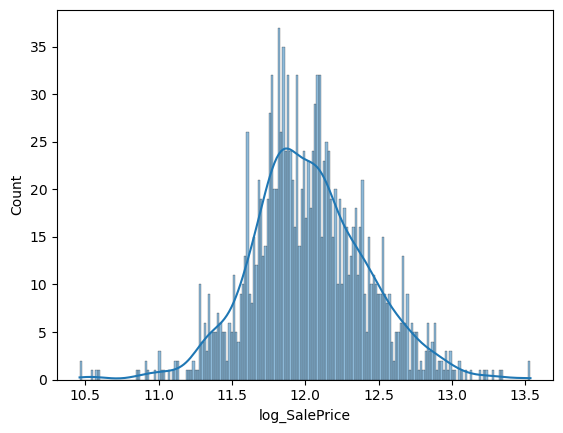

In [185]:
newtrain['log_SalePrice'] = np.log1p(newtrain['SalePrice'])
sns.histplot(data=newtrain,x= 'log_SalePrice',bins=200,kde=True)

In [186]:
#now we will proceed with log transformed sale_price as target and check for change in results

In [187]:
y_log = newtrain['log_SalePrice']

In [188]:
lr_log = LinearRegression()
lr_log.fit(X, y_log)

y_pred_log = lr_log.predict(X)

r2_train = r2_score(y_log, y_pred_log)
rmse_train = mean_squared_error(y_log, y_pred_log, squared=False)

print(f'R-squared on training data: {r2_train}')
print(f'RMSE on training data: {rmse_train}')


R-squared on training data: 0.9439105213909206
RMSE on training data: 0.09457003613095913


In [189]:
kf_log = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_log, X, y_log, cv=kf_log, scoring='r2')

print(f'Cross-validated R-squared: {cv_scores.mean()}')
#looks good and is much better than the previous linear model where log transformation was not used.

Cross-validated R-squared: 0.8012430360120575


In [190]:
#now we will make one model after removing the multicollinearity ie with X_vif

In [191]:
X_vif
#all the variables with multicollinearity 

,Exterior1st_Stucco,Neighborhood_Sawyer,BldgType_2fmCon,Exterior2nd_Stucco,BsmtExposure_No,Neighborhood_NWAmes,Exterior1st_WdShing,Neighborhood_Gilbert,RoofStyle_Gambrel,GarageQual_Po,...,HeatingQC_Po,Utilities_NoSeWa,SaleType_ConLI,SaleType_CWD,Foundation_Wood,3SsnPorch,LotConfig_FR3,SaleType_Oth,SaleType_Con,Condition1_RRNe
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1456,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [192]:
X_vif.shape,y.shape

((1460, 140), (1460,))

In [193]:
lr_log_vif = LinearRegression()
lr_log_vif.fit(X_vif, y_log)

y_pred_log_vif = lr_log_vif.predict(X_vif)

r2_train = r2_score(y_log, y_pred_log_vif)
rmse_train = mean_squared_error(y_log, y_pred_log_vif, squared=False)

print(f'R-squared on training data: {r2_train}')
print(f'RMSE on training data: {rmse_train}')


R-squared on training data: 0.748002758990812
RMSE on training data: 0.20045216278689015


In [194]:
sfs = SequentialFeatureSelector(estimator= lr,k_features= 'best',cv = 5)

In [195]:
sfs.fit(X,y_log)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 253),
                          scoring='r2')

In [196]:
sfs_features = list(sfs.k_feature_names_)

In [197]:
X_sfs = X[sfs_features]

In [198]:
X_sfs

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,GarageFinish_No_garage,GarageQual_Fa,GarageQual_No_garage,GarageCond_Po,PoolQC_No_pool,MiscFeature_Othr,SaleType_ConLD,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,150.0,0,1710,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,20,9600,6,8,1976,1976,284.0,0,1262,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,60,11250,7,5,2001,2002,434.0,0,1786,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,70,9550,7,5,1915,1970,540.0,0,1717,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,60,14260,8,5,2000,2000,490.0,0,2198,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,953.0,0,1647,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1456,20,13175,6,6,1978,1988,589.0,0,2073,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1457,70,9042,7,9,1941,2006,877.0,0,2340,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1458,20,9717,5,6,1950,1996,0.0,0,1078,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [199]:
lr_sfs = LinearRegression()
lr_sfs.fit(X_sfs, y_log)

y_pred_sfs = lr_sfs.predict(X_sfs)

r2_train = r2_score(y_log, y_pred_sfs)
rmse_train = mean_squared_error(y_log, y_pred_sfs, squared=False)

print(f'R-squared on training data: {r2_train}')
print(f'RMSE on training data: {rmse_train}')


R-squared on training data: 0.9213301992001165
RMSE on training data: 0.11199970498964364


In [200]:
kf_sfs = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_sfs = cross_val_score(lr_sfs, X, y_log, cv=kf_sfs, scoring='r2')

print(f'Cross-validated R-squared: {cv_scores_sfs.mean()}')
#looks good and is much better than the previous linear model where log transformation was not used.

Cross-validated R-squared: 0.8012430360120575


In [201]:
rf1 = RandomForestRegressor()
rf1.fit(X,y_log)
y_pred_rf_log = rf1.predict(X)

r2_train_rf = r2_score(y_log, y_pred_rf_log)
rmse_train_rf = mean_squared_error(y_log, y_pred_rf_log, squared=False)

print(f'R-squared on training data: {r2_train_rf}')
print(f'RMSE on training data: {rmse_train_rf}')


R-squared on training data: 0.9812048432584195
RMSE on training data: 0.054743912068009326


In [202]:
xg1 = XGBRegressor()
xg1.fit(X,y_log)
y_pred_xg_log = xg1.predict(X)

r2_train_xg = r2_score(y_log, y_pred_xg_log)
rmse_train_xg = mean_squared_error(y_log, y_pred_xg_log, squared=False)

print(f'R-squared on training data: {r2_train_xg}')
print(f'RMSE on training data: {rmse_train_xg}')


R-squared on training data: 0.9992060269394795
RMSE on training data: 0.011251637634722384


In [203]:
X_test.drop('SalePrice',axis = 1,inplace = True)

In [204]:
y_pred_sub1 = lr_log.predict(X_test)

submission = pd.DataFrame({'Id': test_original['Id'], 'SalePrice': np.exp(y_pred_sub1)})

submission.to_csv('lr_submission.csv', index=False)

#submitted with a score of 0.155

In [205]:
#Now we will try to tune the xgboost model

In [206]:
from sklearn.model_selection import RandomizedSearchCV

In [207]:
xg2 = XGBRegressor()

In [208]:
param_grid={'n_estimators': [500,1000],
            'min_samples_split':[5,7,9,11],
            'max_depth':[3,5,7,9],
            'learning_rate':[0.01,0.1],
            'gamma':[0,1,3]
           }

In [209]:
gscv = RandomizedSearchCV(estimator= xg2,param_distributions= param_grid,cv = 3)

In [210]:
gscv.fit(X,y_log)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'gamma': [0, 1, 3],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_samples_split': [5, 7, 9, 11],
                                        'n_estimators': [500, 1000]})

In [211]:
xgb_tuned = XGBRegressor(**gscv.best_params_)

In [212]:

xgb_tuned.fit(X,y_log)
y_pred_xg_log1 = xgb_tuned.predict(X)

r2_train_xg = r2_score(y_log, y_pred_xg_log1)
rmse_train_xg = mean_squared_error(y_log, y_pred_xg_log1, squared=False)

print(f'R-squared on training data: {r2_train_xg}')
print(f'RMSE on training data: {rmse_train_xg}')

R-squared on training data: 0.9855975357971363
RMSE on training data: 0.04792159403324666


In [213]:
y_pred_xg1 = xgb_tuned.predict(X_test)

submission_3 = pd.DataFrame({'Id': test_original['Id'], 'SalePrice': np.exp(y_pred_xg1)})

submission_3.to_csv('xg_submission2.csv', index=False)
# submitted with a score of 0.135